In [75]:
import pandas as pd
import csv
import numpy as np
import seaborn as sn
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [76]:
#Fonctions d'affichage
def niceDisplay14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
        display from 1 up to 4 images or vectors with optionnal titles
        2D arrays are displayed as image with imshow()
        1D arrays are displayed as curve with plot()
    """
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('niceDisplay_14 : affichage should be a list of length 1 up to 4')
        
    if nb_affichages != len(titres):
        raise ValueError('niceDisplay_14 : titres must have same length than affichage')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = plt.subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
            # on affiche une image
        s.imshow(affichages[i])

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = plt.gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    plt.show()

    

def imshow(I, title=None, size=500, axis=False):
    """ display an image, with title, size, and axis """
    plt.figure(figsize=(size//80, size//80))
    plt.gray()
    plt.imshow(I)
    if not axis: plt.axis('off')
    if title: plt.title(title)
    plt.show()

In [77]:
#Fonctions pour calculer les entropies

# Entropie d'une image en niveaux de gris
def entropy_bw(I):
    p, _ = np.histogram(I, bins = 256)
    p = p/p.sum() #normalisation de l'histogramme
    ent_I = -(np.sum(p[p>0]*np.log2(p[p>0]))) #calcul de l'entropie
    return ent_I

# Entropie d'une image en couleur
def entropy_color(I, k):
    I = I/k #Réduire la dynamique de l'image en la divisant par k
    I = I.astype(int) # Ne garder que la partie entière des valeurs
    p_values = int(256/k)
    H_3d = np.zeros((p_values,p_values,p_values)) # Initialiser l'histogramme 3D par la nouvelle dynamique
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            x = I[i,j] # x est un pixel qui a trois valeurs R G B
            H_3d[x[0],x[1],x[2]] += 1 #on va incrémenter le nombre des valeurs R G B sur l'histogramme3D
            
    p = H_3d/H_3d.sum() # On normalise l'histogramme
    entropy = -(np.sum(p[p>0]*np.log2(p[p>0]))) #calcul de l'entropie

    return entropy

In [78]:
# Charger les données du dataset Ava après les avoir nettoyer avec la librairie Panda
data = pd.read_csv("Ava_EssentialsV1.csv")

In [79]:
data


,ID,Tag1,Tag2,B,Entropy_Color,Entropy_BW,E/E_bw,Entropy_Color_NonR
0,953417,22,0,6.112903,11.094118,6.689572,2.299058,15.379713
1,953777,20,53,6.593750,11.235859,7.698757,2.023211,15.576208
2,953756,0,0,5.796875,9.316750,7.766329,1.663045,12.915759
3,954195,0,0,5.040984,12.796335,7.210267,2.460309,17.739487
4,953903,21,28,5.943548,5.568864,7.566631,1.020280,7.720084
...,...,...,...,...,...,...,...,...
249731,56938,9,0,5.339844,7.322678,5.114791,1.984712,10.151388
249732,57304,1,18,6.235294,1.932998,1.662843,1.611520,2.679705
249733,56711,9,24,7.072581,7.433306,7.579280,1.359595,10.304750
249734,57303,22,0,5.608871,12.011088,7.541434,2.207923,16.650904


In [80]:
#Trier les notes par ordre ascendant
data2 = data.sort_values(by=["B"])
data2

,ID,Tag1,Tag2,B,Entropy_Color,Entropy_BW,E/E_bw,Entropy_Color_NonR
131977,7143,0,0,1.808989,2.879844,3.969770,1.005678,3.992311
52460,221721,0,0,1.880519,11.116596,7.226441,2.132568,15.410874
110382,309716,0,0,1.935484,10.013520,7.585779,1.829962,13.881687
170278,8791,0,0,1.988764,3.424876,4.427804,1.072289,4.747886
7332,212523,0,0,2.000000,9.967788,6.642144,2.080396,13.818288
...,...,...,...,...,...,...,...,...
161842,55938,13,18,8.388060,7.718247,6.726054,1.590793,10.699762
236683,491369,0,0,8.399254,11.186753,7.684606,2.018078,15.508133
160323,150,0,0,8.517442,10.623916,7.235449,2.035516,14.727875
75162,9482,28,29,8.571429,13.293221,7.340880,2.510369,18.428317


In [81]:
lowest_rated_image = np.array(Image.open('images/7143.jpg'))#Charger l'image avec la note la plus basse
lri_b = data2["B"][131989] #Récupérer sa note
lri_bw_entropy = data2["Entropy_BW"][131989] #Récupérer son entropie Black & White
lri_color_entropy = data2["Entropy_Color_NonR"][131989] #Récupérer son entropie Couleur
r1 = data2["E/E_bw"][131989] #Récupérer le rapport E/E_bw de cette image

#Ici on fait la même chose avec l'image qui a la note la plus haute
highest_rated_image = np.array(Image.open('images/106.jpg')) 
hri_b = data2["B"][218129]
hri_bw_entropy = data2["Entropy_BW"][218129]
hri_color_entropy = data2["Entropy_Color_NonR"][218129]
r2 = data2["E/E_bw"][218129]

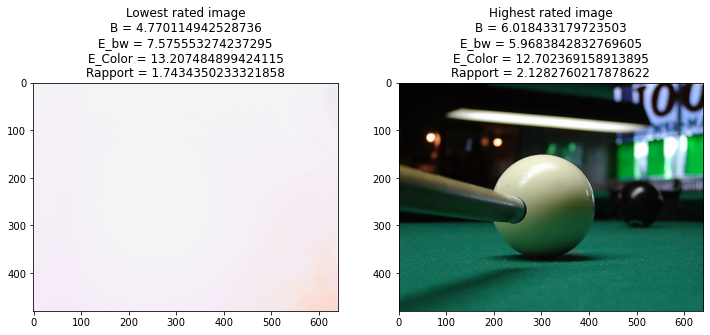

In [82]:
#Afficher les deux images avec leurs données
title1 = 'Lowest rated image\n'+'B = ' + str(lri_b)+ '\n' + 'E_bw = '+str(lri_bw_entropy)+'\n'+'E_Color = '+str(lri_color_entropy) + '\n' + 'Rapport = ' + str(r1)
title2 = 'Highest rated image\n'+'B = ' + str(hri_b)+ '\n' +'E_bw = '+str(hri_bw_entropy)+'\n'+'E_Color = '+str(hri_color_entropy) + '\n' + 'Rapport = ' + str(r2)
niceDisplay14([lowest_rated_image, highest_rated_image],
              [title1, title2])

In [83]:
#Trier les entropies BW par ordre ascendant
data3 = data.sort_values(by=["Entropy_BW"])
data3

,ID,Tag1,Tag2,B,Entropy_Color,Entropy_BW,E/E_bw,Entropy_Color_NonR
172298,695641,12,0,3.690789,0.003392,0.003843,1.223604,0.004702
161568,903287,5,21,3.169118,0.011115,0.013992,1.101271,0.015409
248936,372500,0,0,3.995413,0.009121,0.016306,0.775435,0.012644
143153,169385,19,0,4.167131,0.055364,0.064025,1.198768,0.076751
87849,778385,0,0,5.938931,0.069869,0.087580,1.105953,0.096860
...,...,...,...,...,...,...,...,...
68146,445701,8,0,5.219917,13.081510,7.988464,2.270126,18.134823
114027,880030,2,19,5.158228,12.722016,7.988944,2.207608,17.636459
158106,844364,16,17,4.275701,11.770995,7.989225,2.042509,16.318064
106066,20587,1,21,5.644351,5.993761,7.989646,1.039986,8.309117


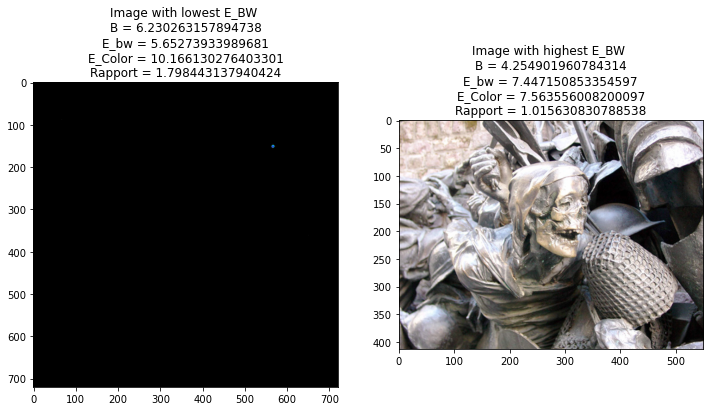

In [84]:
image_with_lowestEbw = np.array(Image.open('images/695641.jpg'))#Charger l'image qui la plus basse Entropie BW
ilbw_b = data3["B"][172299] #Récupérer sa note
ilbw_bw_entropy = data3["Entropy_BW"][172299] #Récupérer son entropie Black & White
ilbw_color_entropy = data3["Entropy_Color_NonR"][172299] #Récupérer son entropie Couleur
r1 = data3["E/E_bw"][172299] #Récupérer le rapport E/E_bw de cette image

#Ici on fait la même chose avec l'image qui l'entropie BW la plus haute
image_with_highestEbw = np.array(Image.open('images/86983.jpg')) 
ihbw_b = data3["B"][123437]
ihbw_bw_entropy = data3["Entropy_BW"][123437]
ihbw_color_entropy = data3["Entropy_Color_NonR"][123437]
r2 = data3["E/E_bw"][123437]

#Afficher les deux images avec leurs données
title1 = 'Image with lowest E_BW \n'+'B = ' + str(ilbw_b)+ '\n' + 'E_bw = '+str(ilbw_bw_entropy)+'\n'+'E_Color = '+str(ilbw_color_entropy) + '\n' + 'Rapport = ' + str(r1)
title2 = 'Image with highest E_BW \n'+'B = ' + str(ihbw_b)+ '\n' +'E_bw = '+str(ihbw_bw_entropy)+'\n'+'E_Color = '+str(ihbw_color_entropy) + '\n' + 'Rapport = ' + str(r2)
niceDisplay14([image_with_lowestEbw, image_with_highestEbw],
              [title1, title2])

In [85]:
#Trier les entropies couleur par ordre ascendant
data4 = data.sort_values(by=["Entropy_Color_NonR"])
data4

,ID,Tag1,Tag2,B,Entropy_Color,Entropy_BW,E/E_bw,Entropy_Color_NonR
172298,695641,12,0,3.690789,0.003392,0.003843,1.223604,0.004702
248936,372500,0,0,3.995413,0.009121,0.016306,0.775435,0.012644
161568,903287,5,21,3.169118,0.011115,0.013992,1.101271,0.015409
143153,169385,19,0,4.167131,0.055364,0.064025,1.198768,0.076751
155998,260183,1,41,4.295652,0.058141,0.097154,0.829621,0.080601
...,...,...,...,...,...,...,...,...
59079,828296,0,0,5.481203,15.814384,7.511514,2.918638,21.923392
28691,348463,1,28,5.924188,15.830482,7.673700,2.859860,21.945708
4875,311640,1,22,6.198980,15.903677,7.379060,2.987803,22.047178
5121,401041,1,22,5.962733,15.998172,7.482099,2.964165,22.178175


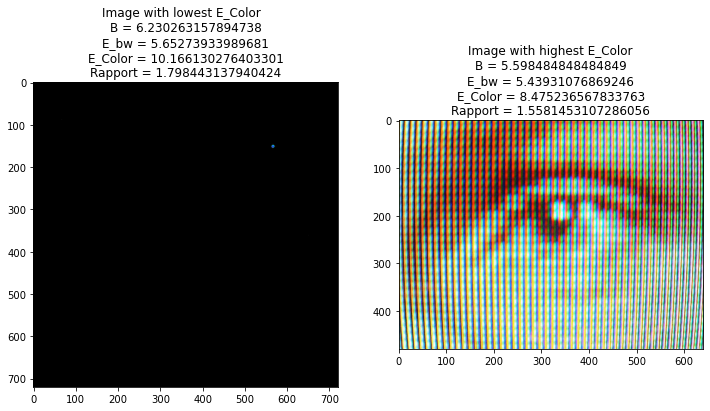

In [86]:
image_with_lowestEc = np.array(Image.open('images/695641.jpg'))#Charger l'image qui la plus basse Entropie Couleur
ilc_b = data4["B"][172299] #Récupérer sa note
ilc_bw_entropy = data4["Entropy_BW"][172299] #Récupérer son entropie Black & White
ilc_color_entropy = data4["Entropy_Color_NonR"][172299] #Récupérer son entropie Couleur
r1 = data4["E/E_bw"][172299] #Récupérer le rapport E/E_bw de cette image

#Ici on fait la même chose avec l'image qui l'entropie BW la plus haute
image_with_highestEc = np.array(Image.open('images/8067.jpg')) 
ihc_b = data4["B"][136988]
ihc_bw_entropy = data4["Entropy_BW"][136988]
ihc_color_entropy = data4["Entropy_Color_NonR"][136988]
r2 = data4["E/E_bw"][136988]

#Afficher les deux images avec leurs données
title1 = 'Image with lowest E_Color  \n'+'B = ' + str(ilc_b)+ '\n' + 'E_bw = '+str(ilc_bw_entropy)+'\n'+'E_Color = '+str(ilc_color_entropy) + '\n' + 'Rapport = ' + str(r1)
title2 = 'Image with highest E_Color\n'+'B = ' + str(ihc_b)+ '\n' +'E_bw = '+str(ihc_bw_entropy)+'\n'+'E_Color = '+str(ihc_color_entropy) + '\n' + 'Rapport = ' + str(r2)
niceDisplay14([image_with_lowestEc, image_with_highestEc],
              [title1, title2])

In [87]:
#Trier les rapports par ordre ascendant
data5 = data.sort_values(by=["E/E_bw"])
data5

,ID,Tag1,Tag2,B,Entropy_Color,Entropy_BW,E/E_bw,Entropy_Color_NonR
113198,770850,0,0,6.128205,0.287296,1.458072,0.273154,0.398277
176188,16926,5,0,4.237113,0.599082,2.774662,0.299317,0.830504
26482,944350,18,21,5.876623,0.502052,2.251408,0.309136,0.695992
143405,458280,12,38,6.028571,0.346888,1.504100,0.319718,0.480889
143093,169971,7,15,5.310145,0.256754,1.070842,0.332390,0.355937
...,...,...,...,...,...,...,...,...
4875,311640,1,22,6.198980,15.903677,7.379060,2.987803,22.047178
27675,657094,1,51,4.669565,15.025072,6.969987,2.988409,20.829172
5286,816099,1,22,5.601449,15.480115,7.153529,2.999917,21.459996
59959,916098,0,0,5.521739,15.737089,7.213506,3.024360,21.816237


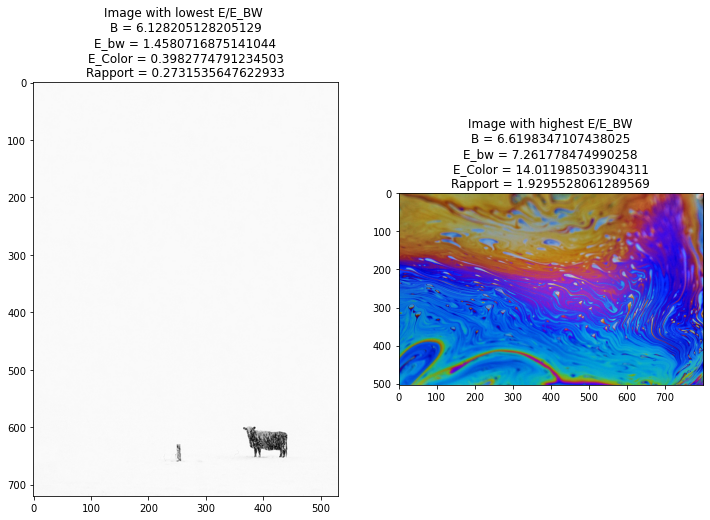

In [88]:
image_with_lowestR = np.array(Image.open('images/770850.jpg'))#Charger l'image qui le rapport le plus bas
ilr_b = data4["B"][113198] #Récupérer sa note
ilr_bw_entropy = data4["Entropy_BW"][113198] #Récupérer son entropie Black & White
ilr_color_entropy = data4["Entropy_Color_NonR"][113198] #Récupérer son entropie Couleur
r1 = data4["E/E_bw"][113198] #Récupérer le rapport E/E_bw de cette image

#Ici on fait la même chose avec l'image qui a le plus haut rapport
image_with_highestR = np.array(Image.open('images/912463.jpg')) 
ihr_b = data4["B"][138305]
ihr_bw_entropy = data4["Entropy_BW"][138305]
ihr_color_entropy = data4["Entropy_Color_NonR"][138305]
r2 = data4["E/E_bw"][138305]

#Afficher les deux images avec leurs données
title1 = 'Image with lowest E/E_BW \n'+'B = ' + str(ilr_b)+ '\n' + 'E_bw = '+str(ilr_bw_entropy)+'\n'+'E_Color = '+str(ilr_color_entropy) + '\n' + 'Rapport = ' + str(r1)
title2 = 'Image with highest E/E_BW\n'+'B = ' + str(ihr_b)+ '\n' +'E_bw = '+str(ihr_bw_entropy)+'\n'+'E_Color = '+str(ihr_color_entropy) + '\n' + 'Rapport = ' + str(r2)
niceDisplay14([image_with_lowestR, image_with_highestR],
              [title1, title2])

In [89]:
#Préparer les valeurs des notes et entropies pour faire des graphes
bw_entropies = np.array(data2["Entropy_BW"])
color_entropies =np.array(data2["Entropy_Color_NonR"])
rapports = np.array(data2["E/E_bw"])
ratings = np.array(data2["B"])

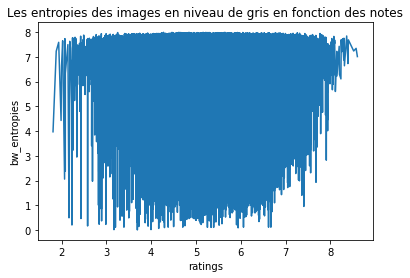

In [90]:
plt.plot(ratings, bw_entropies)
plt.title('Les entropies des images en niveau de gris en fonction des notes')
plt.xlabel('ratings')
plt.ylabel('bw_entropies')
plt.show()

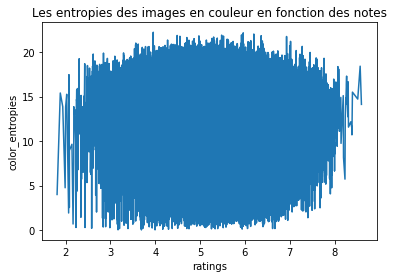

In [91]:
plt.plot(ratings, color_entropies)
plt.title('Les entropies des images en couleur en fonction des notes')
plt.xlabel('ratings')
plt.ylabel('color_entropies')
plt.show()

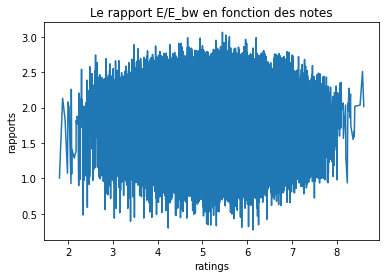

In [92]:
plt.plot(ratings, rapports)
plt.title('Le rapport E/E_bw en fonction des notes')
plt.xlabel('ratings')
plt.ylabel('rapports')
plt.show()

**Les graphes ci-dessus ne nous donnent pas assez d'informations, essayons avec d'autres approches!**

###### Ici nous allons rétrécir la taille de notre data. Pour faire cela nous allons, pour chaque note, calculer la moyenne des entropies/rapports des images correspondantes à cette note.

In [93]:
rounded_ratings = np.around(ratings,1)
rounded_ratings, r_counts = np.unique(rounded_ratings, return_counts = True)


r_bw_entropies = np.around(bw_entropies,2)
r_color_entropies = np.around(color_entropies,2)
r_rapports = np.around(rapports,2)

In [94]:
means_E = []
means_EBW = []
means_rapports = []
for r in rounded_ratings:
    indices = np.where(rounded_ratings == r)
    s = 0
    s1 = 0
    s2 = 0
    for i in indices:
        s +=  r_color_entropies[i]
        s1 += r_bw_entropies[i]
        s2 += r_rapports[i]
    
    mean = s/len(indices)
    means_E.append(mean)
    
    mean = s1/len(indices)
    means_EBW.append(mean)
    
    mean = s2/len(indices)
    means_rapports.append(mean)
 
means_E = np.array(means_E)
means_E = means_E.flatten()

means_EBW = np.array(means_EBW)
means_EBW = means_EBW.flatten()

means_rapports = np.array(means_rapports)
means_rapports = means_rapports.flatten()

##### Réessayons avec les graphes mais maintenant on va prendre les notes dans l'axe des X et les moyennes des entropies / rapports dans l'axe des Y

# 2D PLOTS et HISTOGRAMMES

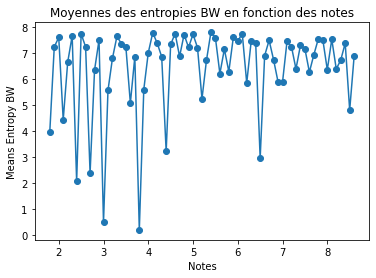

In [134]:
plt.plot(rounded_ratings, means_EBW, '-o')
plt.title('Moyennes des entropies BW en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Means Entropy BW')
plt.show()

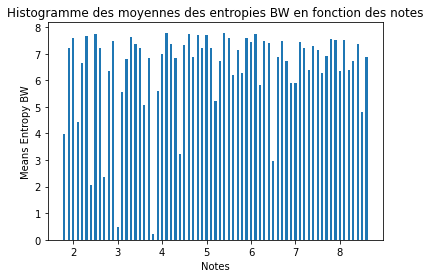

In [136]:
plt.bar(rounded_ratings, means_EBW, width = 0.05)
plt.title('Histogramme des moyennes des entropies BW en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Means Entropy BW')
plt.show()

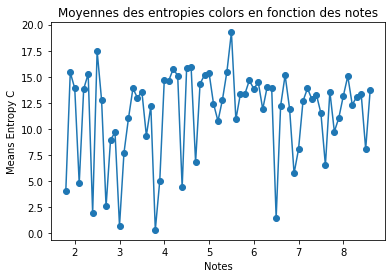

In [137]:
plt.plot(rounded_ratings, means_E, '-o')
plt.title('Moyennes des entropies colors en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Means Entropy C')
plt.show()

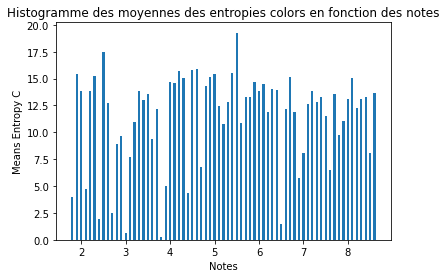

In [138]:
plt.bar(rounded_ratings, means_E, width = 0.05)
plt.title('Histogramme des moyennes des entropies colors en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Means Entropy C')
plt.show()

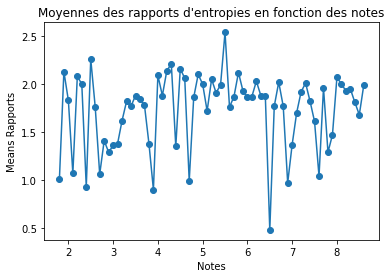

In [141]:
plt.plot(rounded_ratings, means_rapports, '-o')
plt.title('Moyennes des rapports d\'entropies en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Means Rapports')
plt.show()

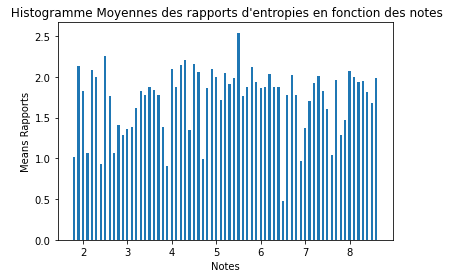

In [142]:
plt.bar(rounded_ratings, means_rapports, width = 0.05)
plt.title(' Histogramme Moyennes des rapports d\'entropies en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Means Rapports')
plt.show()

###### D'après les graphes et histogrammes calculés, on peut déjà remarquer qu'il n'y a pas vraiment une relation linéaire entre les notes et les moyennes des entropies/rapports.

###### Mais on ne peut pas se contenter des résultats parce que nous n'avons pas tenu en compte la distribution des notes.

###### Essayons cette fois avec des graphes..3D :

# 3D PLOTS

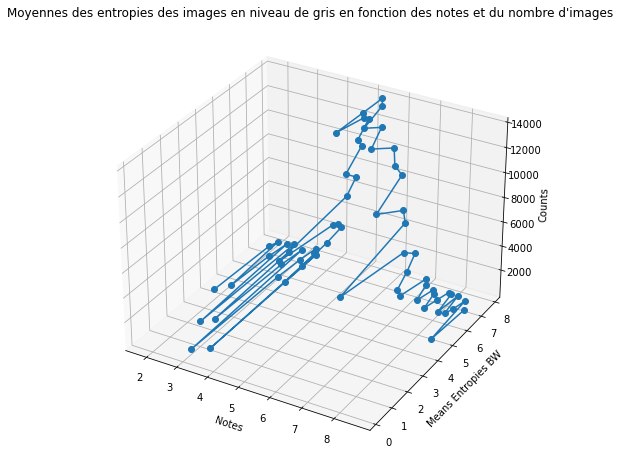

In [143]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.gca(projection='3d')
ax.set_xlabel('Notes')
ax.set_ylabel('Means Entropies BW')
ax.set_zlabel('Counts')
ax.set_title('Moyennes des entropies des images en niveau de gris en fonction des notes et du nombre d\'images')
ax.plot(rounded_ratings, means_EBW, r_counts, '-o')
plt.show()

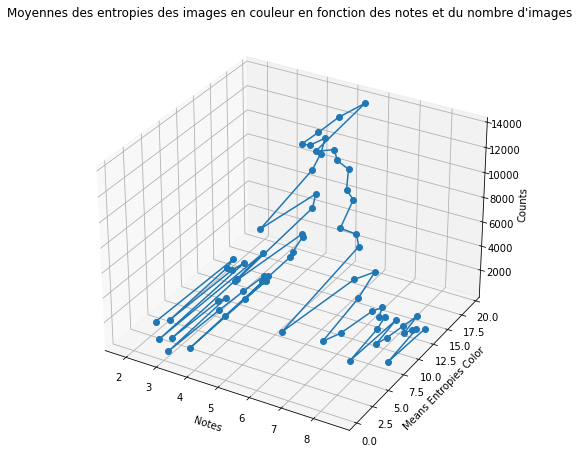

In [144]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.gca(projection='3d')
ax.plot(rounded_ratings, means_E, r_counts, '-o')
ax.set_xlabel('Notes')
ax.set_ylabel('Means Entropies Color')
ax.set_zlabel('Counts')
ax.set_title('Moyennes des entropies des images en couleur en fonction des notes et du nombre d\'images')
plt.show()

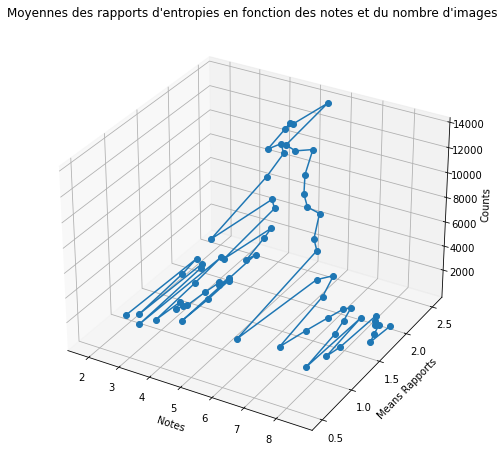

In [145]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.gca(projection='3d')
ax.plot(rounded_ratings, means_rapports, r_counts, '-o')
ax.set_xlabel('Notes')
ax.set_ylabel('Means Rapports')
ax.set_zlabel('Counts')
ax.set_title('Moyennes des rapports d\'entropies en fonction des notes et du nombre d\'images')
plt.show()

###### Le comportement des entropies et rapports n'a pas vraiment changé quand on a tenu en compte la distribution des notes, toujours un comportement aléatoire.

###### Nous allons tenter maintenant de créer une sorte "d'images" avec des les données réelles ( et non les moyennes ) en utilisant les scatter plots pour voir si on peut obtenir d'autres informations.

# SCATTER PLOTS

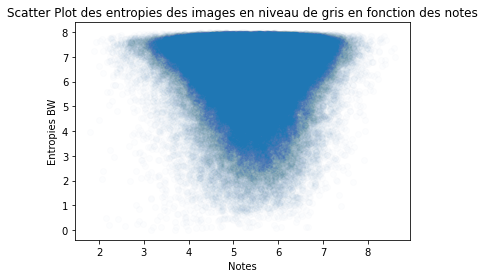

In [153]:
plt.scatter(ratings, bw_entropies, alpha = 0.01)
plt.title('Scatter Plot des entropies des images en niveau de gris en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Entropies BW')
plt.show()

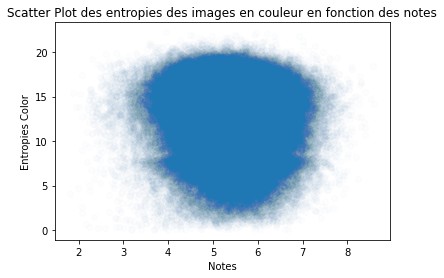

In [154]:
plt.scatter(ratings, color_entropies, alpha = 0.01)
plt.title('Scatter Plot des entropies des images en couleur en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Entropies Color')
plt.show()

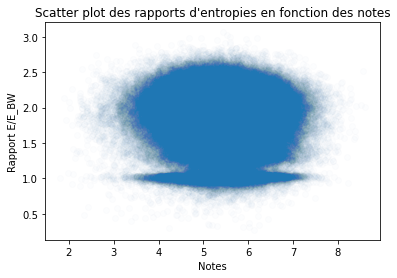

In [155]:
plt.scatter(ratings, rapports, alpha = 0.01)
plt.title('Scatter plot des rapports d\'entropies en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Rapport E/E_BW')
plt.show()

###### Hmm, toujours un comportement aléatoire, on peut expliquer la densité aux centres des 3 scatters plot par le nombre des images qui ont les note qui se trouvent au milieu de notre intervalle. Mais cela ne nous dit toujours pas si on a bien une relation entre les entropies des images et leurs notes.

###### Et si les valeurs d'entropies/rapports sont indépendantes des notes des images? 

###### Testons ça avec un test Chi2! On prend H0 : Les deux variables sont indépendantes. avec un niveau de confiance de 95%

# TEST CHI-SQUARE

In [189]:
chi2_ratings = np.around(ratings,1)
chi2_bw_entropies = np.around(bw_entropies,2)
chi2_color_entropies = np.around(color_entropies,2)
chi2_rapports = np.around(rapports,2)


In [190]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi2_f, p, dof, _ = chi2_contingency([chi2_ratings, chi2_bw_entropies])
print("p is ", p)
print('Degree of Freedom dof=%d' % dof)
print('Chi2 = %d' % chi2_f)
confiance = 0.95
critical = chi2.ppf(confiance, dof)
print('confiance=%.2f, critical=%.3f, Chi2=%.3f' % (confiance, critical, chi2_f))
if abs(chi2_f) >= critical:
    print('Les variables sont dépendantes, on rejette H0')
else:
    print('Les variables sont indépendantes, on ne rejette pas H0')


p is  1.0
Degree of Freedom dof=249735
Chi2 = 40571
confiance=0.95, critical=250898.606, Chi2=40571.327
Les variables sont indépendantes, on ne rejette pas H0


###### D'après le test Chi2 sur les données, il y a bien une indépendance entre les variables notes et Entropy BW. 

In [191]:
chi2_f, p, dof, _ = chi2_contingency([chi2_ratings, chi2_color_entropies])
print("p is ", p)
print('Degree of Freedom dof=%d' % dof)
print('Chi2 = %d' % chi2_f)
confiance = 0.95
critical = chi2.ppf(confiance, dof)
print('confiance=%.2f, critical=%.3f, Chi2=%.3f' % (confiance, critical, chi2_f))
if abs(chi2_f) >= critical:
    print('Les variables sont dépendantes, on rejette H0')
else:
    print('Les variables sont indépendantes, on ne rejette pas H0')

p is  1.0
Degree of Freedom dof=249735
Chi2 = 127890
confiance=0.95, critical=250898.606, Chi2=127890.196
Les variables sont indépendantes, on ne rejette pas H0


###### Même chose pour les variables notes et Entropy Color

In [192]:
chi2_f, p, dof, _ = chi2_contingency([chi2_ratings, chi2_rapports])
print("p is ", p)
print('Degree of Freedom dof=%d' % dof)
print('Chi2 = %d' % chi2_f)
confiance = 0.95
critical = chi2.ppf(confiance, dof)
print('confiance=%.2f, critical=%.3f, Chi2=%.3f' % (confiance, critical, chi2_f))
if abs(chi2_f) >= critical:
    print('Les variables sont dépendantes, on rejette H0')
else:
    print('Les variables sont indépendantes, on ne rejette pas H0')

p is  1.0
Degree of Freedom dof=249735
Chi2 = 24176
confiance=0.95, critical=250898.606, Chi2=24176.001
Les variables sont indépendantes, on ne rejette pas H0


###### Et naturellement aussi entre les notes et rapports.

###### à suivre...